<a href="https://colab.research.google.com/github/Nithilan98/DataScience_Task_6/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [4]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [5]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


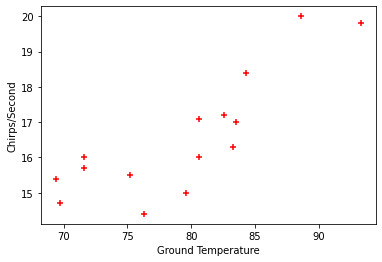

In [6]:
plt.xlabel('Ground Temperature') 
plt.ylabel('Chirps/Second')
plt.scatter( df['Ground Temperature'], df['Chirps/Second'], color='red', marker='+')

In [7]:
x= df[['Ground Temperature']]
y= df['Chirps/Second']

In [8]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

In [9]:
m=reg.coef_[0]

In [10]:
c = reg.intercept_

# 1. Find the linear regression equation for this data 

In [11]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(m, c))

Linear Regression Equation: y = 0.2030 * x + 0.4593


# 2. Chart the original data and the equation on the chart.

Text(0, 0.5, 'Chirps/Sec')

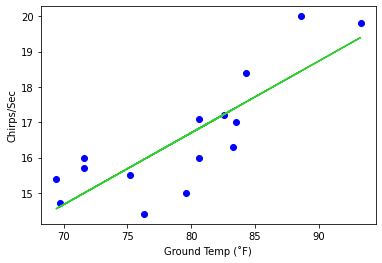

In [13]:
plt.scatter(x, y, color='blue')
plt.plot(x, reg.predict(x), color='limegreen')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')plt.scatter(x, y, color='blue')
plt.plot(x, reg.predict(x), color='limegreen')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')

# 3. Find the equation's  R2  score

In [14]:
print('R^2 value = %.4f'% reg.score(x, y))

R^2 value = 0.6923


# 4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [16]:
reg.predict([[95]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([19.74428913])

# 5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [20]:
((18 - reg.intercept_) / reg.coef_[0])

86.40743134548568

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [22]:
df = pd.read_fwf("brain_body.txt")

In [23]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [25]:
reg_b= linear_model.LinearRegression()
x = df[['Body']]
y = df['Brain']
reg_b.fit(x, y)

LinearRegression()

# 1. Find the linear regression equation for this data for brain weight to body weight.

In [27]:
m=reg_b.coef_[0]
c = reg_b.intercept_
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'.format(m, c))


Linear Regression Equation: y = 0.9029 * x + -56.8555


# 2. Chart the original data and the equation on the chart.

Text(0, 0.5, 'Brain Weight')

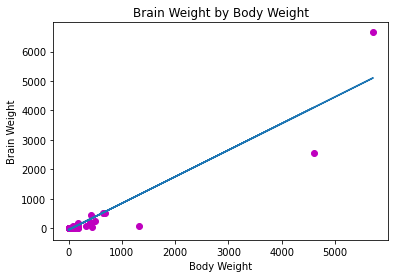

In [28]:
plt.scatter(x, y, color='m')
plt.plot(x, reg_b.predict(x))
plt.title('Brain Weight by Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')

# 3. Find the equation's  R2  score

In [29]:
print('R^2 value = %.4f'% reg_b.score(x, y))

R^2 value = 0.8727


The R2 score for this model is 0.8727 which is equal to  0.8 which says that ther is a strong correlation between the values

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [30]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [31]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [32]:
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
x = df[feature]
y = df.Salary
reg_s = linear_model.LinearRegression()
reg_s.fit(x, y)

LinearRegression()

In [33]:
# . linear regression equation for this data using columns 1-5 to column 6.
m=reg_s.coef_[0]
c = reg_s.intercept_
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'.format(m, c))


Linear Regression Equation: y = 1241.7925 * x + 11410.1465


In [34]:
print("Intercept: ", reg_s.intercept_)
print("Coefficients:")
list(zip(x, reg_s.coef_))

Intercept:  11410.14654725559
Coefficients:


[('Sex', 1241.792499601427),
 ('Rank', 5586.1814495214385),
 ('Year', 482.85976782882153),
 ('Degree', -1331.6440634059095),
 ('YSdeg', -128.79057354486122)]

In [35]:
# 2. Find the selection of columns with the best  R2  score.

print("Coefficients:")
list(zip(x, reg_s.coef_))

Coefficients:


[('Sex', 1241.792499601427),
 ('Rank', 5586.1814495214385),
 ('Year', 482.85976782882153),
 ('Degree', -1331.6440634059095),
 ('YSdeg', -128.79057354486122)]

since the coeffecient value of degree and YSdeg have is negative,we can conclude that sex, Rank, Year are the best columns  

In [36]:
## 3.Report whether sex is a factor in salary.
corr = df.corr()["Salary"].sort_values(ascending=False)[1:]
corr


Rank      0.867488
Year      0.700669
YSdeg     0.674854
Degree   -0.069726
Sex      -0.252782
Name: Salary, dtype: float64

 From the result given above, the correlation value between sex and salary is -0.252782

 Since the corrrelation between sex and city is negative, we can conclude that sex is not a factor or a bad factor to predict the salary.  